In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
import scipy
from pathlib import Path
import scipy.io
import seaborn as sns

%matplotlib inline

# PEG

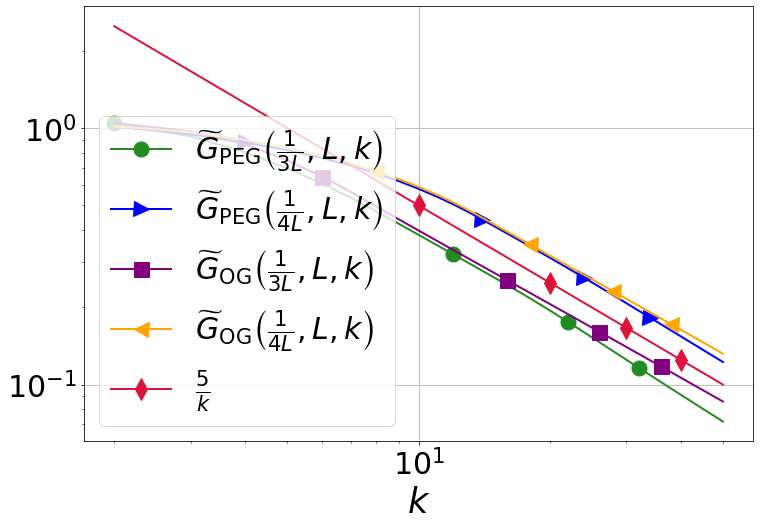

In [2]:
L = 1.0
gamma_1 = 1.0/(3*L)
gamma_2 = 1.0/(4*L)
N_max = 40

worst_case_sq_norm_gamma_1 = np.array([])
worst_case_sq_norm_gamma_2 = np.array([])
worst_case_sq_norm_gamma_1_OG = np.array([])
worst_case_sq_norm_gamma_2_OG = np.array([])
guessed_upper_bound = np.array([])

gamma_1_str = '%.6f' % gamma_1
gamma_2_str = '%.6f' % gamma_2

for N in range(N_max-1):
    res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1_OG = np.append(worst_case_sq_norm_gamma_1_OG, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_gamma_2_OG = np.append(worst_case_sq_norm_gamma_2_OG, res['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(N+2))
    
x_array = np.array(range(N_max-1))+2
    
# add result for N = 45    
res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_2_str+'.mat')
worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG = np.append(worst_case_sq_norm_gamma_1_OG, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(45)+'__'+gamma_2_str+'.mat')
worst_case_sq_norm_gamma_2_OG = np.append(worst_case_sq_norm_gamma_2_OG, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(45))
x_array = np.append(x_array, 45)
# add result for N = 50    
res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_2_str+'.mat')
worst_case_sq_norm_gamma_2 = np.append(worst_case_sq_norm_gamma_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG = np.append(worst_case_sq_norm_gamma_1_OG, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_norm_L_'+str(int(L))+'_N_'+str(50)+'__'+gamma_2_str+'.mat')
worst_case_sq_norm_gamma_2_OG = np.append(worst_case_sq_norm_gamma_2_OG, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(50))
x_array = np.append(x_array, 50)
    
fig = plt.figure(figsize=(12,8))

plt.semilogy(x_array, worst_case_sq_norm_gamma_1, linewidth=2,
             markersize = 15, marker = "o",
             markevery=range(0, N_max-1, 10), color="forestgreen",
             label=r'$\widetilde{G}_{\mathrm{PEG}}\left(\frac{1}{3L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_2, linewidth=2,
             markersize = 15, marker = ">",
             markevery=range(2, N_max-1, 10), color="blue",
             label=r'$\widetilde{G}_{\mathrm{PEG}}\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_1_OG, linewidth=2,
             markersize = 15, marker = "s",
             markevery=range(4, N_max-1, 10), color="purple",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{3L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_2_OG, linewidth=2,
             markersize = 15, marker = "<",
             markevery=range(6, N_max-1, 10), color="orange",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, guessed_upper_bound, linewidth=2, 
             markersize = 15, marker = "d",
             markevery=range(8, N_max-1, 10), color="crimson",
             label=r'$\frac{5}{k}$')


plt.legend(loc='best', fontsize=30)
plt.xlabel(r"$k$", fontsize=35)

plt.xticks(fontsize=30)
_ = plt.yticks(fontsize=30)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

plt.savefig("plot/PEG_OG_norm_L_"+str(L)+'_N_'+str(N_max)+".pdf", bbox_inches='tight')

# Distance-t constraints

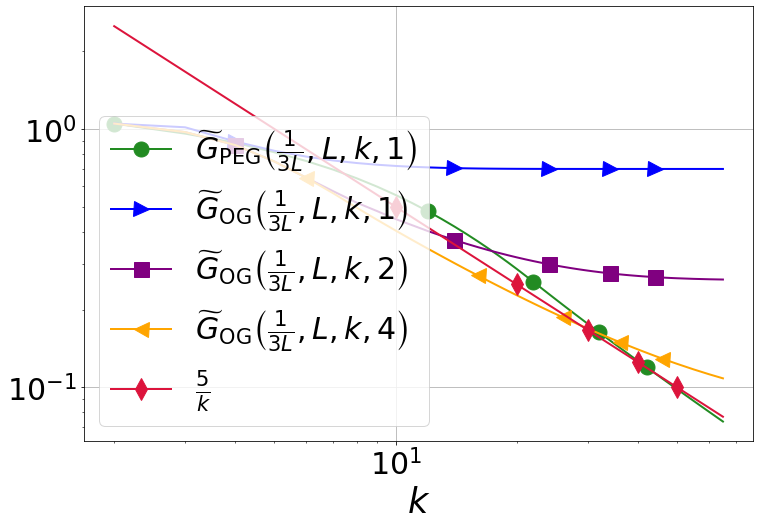

In [3]:
L = 1.0
gamma_1 = 1.0/(3*L)
N_max = 50

worst_case_sq_norm_gamma_1 = np.array([])
worst_case_sq_norm_gamma_1_OG_1 = np.array([])
worst_case_sq_norm_gamma_1_OG_2 = np.array([])
worst_case_sq_norm_gamma_1_OG_4 = np.array([])
worst_case_sq_norm_gamma_1_OG_6 = np.array([])
guessed_upper_bound = np.array([])

gamma_1_str = '%.6f' % gamma_1

for N in range(N_max-1):
    res = scipy.io.loadmat('dump/EFTP_dist_1_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_dist_1_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1_OG_1 = np.append(worst_case_sq_norm_gamma_1_OG_1, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_dist_2_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1_OG_2 = np.append(worst_case_sq_norm_gamma_1_OG_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_dist_4_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1_OG_4 = np.append(worst_case_sq_norm_gamma_1_OG_4, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/OG_dist_6_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_1_str+'.mat')
    worst_case_sq_norm_gamma_1_OG_6 = np.append(worst_case_sq_norm_gamma_1_OG_6, res['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(N+2))
    
x_array = np.array(range(N_max-1))+2

# add result for N = 55    
res = scipy.io.loadmat('dump/EFTP_dist_1_norm_L_'+str(int(L))+'_N_'+str(55)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_1_norm_L_'+str(int(L))+'_N_'+str(55)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_1 = np.append(worst_case_sq_norm_gamma_1_OG_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_2_norm_L_'+str(int(L))+'_N_'+str(55)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_2 = np.append(worst_case_sq_norm_gamma_1_OG_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_4_norm_L_'+str(int(L))+'_N_'+str(55)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_4 = np.append(worst_case_sq_norm_gamma_1_OG_4, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_6_norm_L_'+str(int(L))+'_N_'+str(55)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_6 = np.append(worst_case_sq_norm_gamma_1_OG_6, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(55))
x_array = np.append(x_array, 55)
# add result for N = 60    
res = scipy.io.loadmat('dump/EFTP_dist_1_norm_L_'+str(int(L))+'_N_'+str(60)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_1_norm_L_'+str(int(L))+'_N_'+str(60)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_1 = np.append(worst_case_sq_norm_gamma_1_OG_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_2_norm_L_'+str(int(L))+'_N_'+str(60)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_2 = np.append(worst_case_sq_norm_gamma_1_OG_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_4_norm_L_'+str(int(L))+'_N_'+str(60)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_4 = np.append(worst_case_sq_norm_gamma_1_OG_4, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_6_norm_L_'+str(int(L))+'_N_'+str(60)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_6 = np.append(worst_case_sq_norm_gamma_1_OG_6, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(60))
x_array = np.append(x_array, 60)

# add result for N = 65    
res = scipy.io.loadmat('dump/EFTP_dist_1_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_1_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_1 = np.append(worst_case_sq_norm_gamma_1_OG_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_2_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_2 = np.append(worst_case_sq_norm_gamma_1_OG_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_4_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_4 = np.append(worst_case_sq_norm_gamma_1_OG_4, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_6_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_6 = np.append(worst_case_sq_norm_gamma_1_OG_6, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(65))
x_array = np.append(x_array, 65)

# add result for N = 65    
res = scipy.io.loadmat('dump/EFTP_dist_1_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1 = np.append(worst_case_sq_norm_gamma_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_1_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_1 = np.append(worst_case_sq_norm_gamma_1_OG_1, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_2_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_2 = np.append(worst_case_sq_norm_gamma_1_OG_2, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_4_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_4 = np.append(worst_case_sq_norm_gamma_1_OG_4, res['res_norm'][0][0])
res = scipy.io.loadmat('dump/OG_dist_6_norm_L_'+str(int(L))+'_N_'+str(65)+'__'+gamma_1_str+'.mat')
worst_case_sq_norm_gamma_1_OG_6 = np.append(worst_case_sq_norm_gamma_1_OG_6, res['res_norm'][0][0])
guessed_upper_bound = np.append(guessed_upper_bound, 5.0/(65))
x_array = np.append(x_array, 65)

        
fig = plt.figure(figsize=(12,8))

plt.semilogy(x_array, worst_case_sq_norm_gamma_1, linewidth=2,
             markersize = 15, marker = "o",
             markevery=range(0, N_max-1, 10), color="forestgreen",
             label=r'$\widetilde{G}_{\mathrm{PEG}}\left(\frac{1}{3L}, L, k, 1\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_1_OG_1, linewidth=2,
             markersize = 15, marker = ">",
             markevery=range(2, N_max-1, 10), color="blue",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{3L}, L, k, 1\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_1_OG_2, linewidth=2,
             markersize = 15, marker = "s",
             markevery=range(2, N_max-1, 10), color="purple",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{3L}, L, k, 2\right)$')
plt.semilogy(x_array, worst_case_sq_norm_gamma_1_OG_4, linewidth=2,
             markersize = 15, marker = "<",
             markevery=range(4, N_max-1, 10), color="orange",
             label=r'$\widetilde{G}_{\mathrm{OG}}\left(\frac{1}{3L}, L, k, 4\right)$')
plt.semilogy(x_array, guessed_upper_bound, linewidth=2, 
             markersize = 15, marker = "d",
             markevery=range(8, N_max-1, 10), color="crimson",
             label=r'$\frac{5}{k}$')


plt.legend(loc='best', fontsize=30)
plt.xlabel(r"$k$", fontsize=35)

plt.xticks(fontsize=30)
_ = plt.yticks(fontsize=30)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

plt.savefig("plot/PEG_OG_norm_dist_constr_L_"+str(L)+'_N_'+str(N_max)+".pdf", bbox_inches='tight')

# PEG and OG differences of operator norms

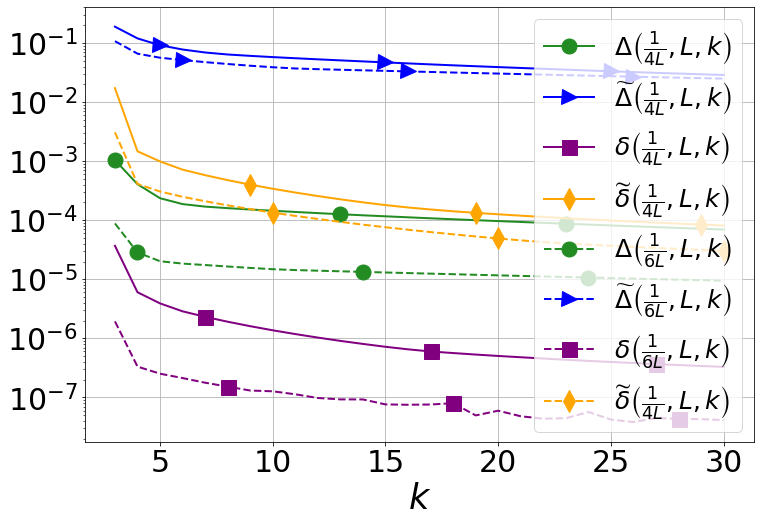

In [4]:
L = 1.0
gamma = 1.0/(4*L)
gamma_2 = 1.0/(6*L)
N_max = 30

worst_case_sq_norm_diff = np.array([])
worst_case_sq_norm_diff_tilde = np.array([])
worst_case_sq_norm_diff_cocoercive = np.array([])
worst_case_sq_norm_diff_cocoercive_tilde = np.array([])
worst_case_sq_norm_diff_2 = np.array([])
worst_case_sq_norm_diff_tilde_2 = np.array([])
worst_case_sq_norm_diff_cocoercive_2 = np.array([])
worst_case_sq_norm_diff_cocoercive_tilde_2 = np.array([])

gamma_str = '%.6f' % gamma
gamma_2_str = '%.6f' % gamma_2

for N in np.arange(1, N_max-1):
    res = scipy.io.loadmat('dump/EFTP_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_diff = np.append(worst_case_sq_norm_diff, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_tilde_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_diff_tilde = np.append(worst_case_sq_norm_diff_tilde, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_cocoercive_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_diff_cocoercive = np.append(worst_case_sq_norm_diff_cocoercive, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_cocoercive_tilde_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_diff_cocoercive_tilde = np.append(worst_case_sq_norm_diff_cocoercive_tilde, res['res_norm'][0][0])
    
    res = scipy.io.loadmat('dump/EFTP_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_diff_2 = np.append(worst_case_sq_norm_diff_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_tilde_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_diff_tilde_2 = np.append(worst_case_sq_norm_diff_tilde_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_cocoercive_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_diff_cocoercive_2 = np.append(worst_case_sq_norm_diff_cocoercive_2, res['res_norm'][0][0])
    res = scipy.io.loadmat('dump/EFTP_cocoercive_tilde_norm_diff_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_2_str+'.mat')
    worst_case_sq_norm_diff_cocoercive_tilde_2 = np.append(worst_case_sq_norm_diff_cocoercive_tilde_2, res['res_norm'][0][0])
    
x_array = np.arange(1, N_max-1)+2
        
fig = plt.figure(figsize=(12,8))

plt.semilogy(x_array, worst_case_sq_norm_diff, linewidth=2,
             markersize = 15, marker = "o",
             markevery=range(0, N_max-1, 10), color="forestgreen",
             label=r'$\Delta\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_diff_tilde, linewidth=2,
             markersize = 15, marker = ">",
             markevery=range(2, N_max-1, 10), color="blue",
             label=r'$\widetilde{\Delta}\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_diff_cocoercive, linewidth=2,
             markersize = 15, marker = "s",
             markevery=range(4, N_max-1, 10), color="purple",
             label=r'$\delta\left(\frac{1}{4L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_diff_cocoercive_tilde, linewidth=2, 
             markersize = 15, marker = "d",
             markevery=range(6, N_max-1, 10), color="orange",
             label=r'$\widetilde\delta\left(\frac{1}{4L}, L, k\right)$')

plt.semilogy(x_array, worst_case_sq_norm_diff_2, linewidth=2, linestyle="--",
             markersize = 15, marker = "o",
             markevery=range(1, N_max-1, 10), color="forestgreen",
             label=r'$\Delta\left(\frac{1}{6L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_diff_tilde_2, linewidth=2, linestyle="--",
             markersize = 15, marker = ">",
             markevery=range(3, N_max-1, 10), color="blue",
             label=r'$\widetilde{\Delta}\left(\frac{1}{6L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_diff_cocoercive_2, linewidth=2, linestyle="--",
             markersize = 15, marker = "s",
             markevery=range(5, N_max-1, 10), color="purple",
             label=r'$\delta\left(\frac{1}{6L}, L, k\right)$')
plt.semilogy(x_array, worst_case_sq_norm_diff_cocoercive_tilde_2, linewidth=2, linestyle="--",
             markersize = 15, marker = "d",
             markevery=range(7, N_max-1, 10), color="orange",
             label=r'$\widetilde\delta\left(\frac{1}{4L}, L, k\right)$')


plt.legend(loc='best', fontsize=25)
plt.xlabel(r"$k$", fontsize=35)

plt.xticks(fontsize=30)
_ = plt.yticks(fontsize=30)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

# ax.set_xscale('log')

plt.savefig("plot/PEG_OG_norm_diff_L_"+str(L)+'_N_'+str(N_max)+".pdf", bbox_inches='tight')

# Projected PEG and Projected OG

In [41]:
L = 1.0
gamma = 1.0/(4*L)
N_max = 40

res = scipy.io.loadmat('unconstrained.mat')
list_n=np.append(np.array([]),res['N_list'][0])
wc_og=np.append(np.array([]),res['OG_wc4'][0])
wc_peg=np.append(np.array([]),res['OG_wc3'][0])


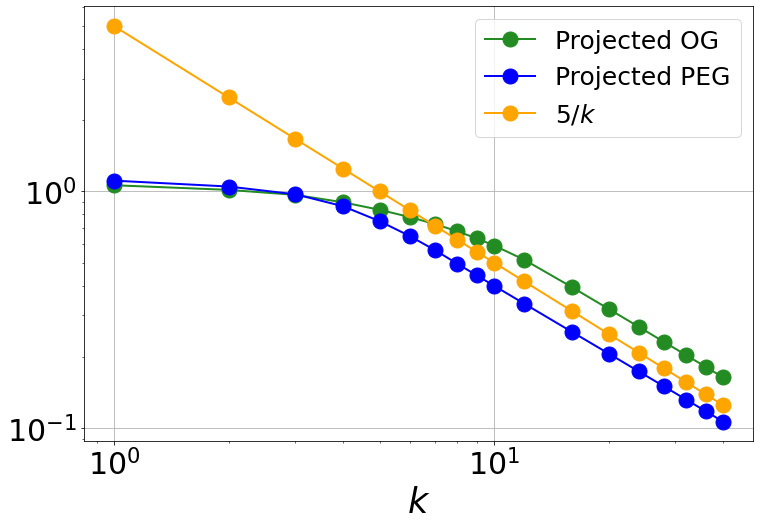

In [47]:
fig = plt.figure(figsize=(12,8))

plt.semilogy(list_n, wc_og, linewidth=2,
             markersize = 15, marker = "o", color="forestgreen",
             label=r'Projected OG')
plt.semilogy(list_n, wc_peg, linewidth=2,
             markersize = 15, marker = "o", color="blue",
             label=r'Projected PEG')

plt.semilogy(list_n, 5/list_n, linewidth=2,
             markersize = 15, marker = "o", color="orange",
             label=r'$5/k$')

plt.legend(loc='best', fontsize=25)
plt.xlabel(r"$k$", fontsize=35)

plt.xticks(fontsize=30)
_ = plt.yticks(fontsize=30)

plt.grid()
plt.loglog()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

plt.savefig("projected_PEG_OG.pdf", bbox_inches='tight')